In [1]:
import mysql.connector

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='68.178.153.133',  
    user='prab',       
    password= 'nb))[d{3f$*r',      
    database='cx360_prab'     
)
cursor = conn.cursor()

In [2]:
import pandas as pd

# Fetch all tables in the database
cursor.execute("SHOW TABLES;")
tables = cursor.fetchall()

# Print all table names
print("Tables in the database:")
for table in tables:
    print(table[0])

# Fetch table structure for each table (columns and types)
print("\nTable Structure:")
for table in tables:
    table_name = table[0]
    cursor.execute(f"DESCRIBE {table_name};")
    print(f"\n{table_name}:")
    columns = cursor.fetchall()
    for column in columns:
        print(f"  - {column[0]} ({column[1]})")

# Fetch foreign keys for any relational tables (if defined)
print("\nForeign Keys:")
for table in tables:
    table_name = table[0]
    cursor.execute(f"""
        SELECT
            TABLE_NAME,
            COLUMN_NAME,
            CONSTRAINT_NAME,
            REFERENCED_TABLE_NAME,
            REFERENCED_COLUMN_NAME
        FROM
            INFORMATION_SCHEMA.KEY_COLUMN_USAGE
        WHERE
            TABLE_SCHEMA = 'cx360_xxxx'
            AND TABLE_NAME = '{table_name}'
            AND REFERENCED_TABLE_NAME IS NOT NULL;
    """)
    fk_constraints = cursor.fetchall()
    if fk_constraints:
        print(f"\nForeign Keys for {table_name}:")
        for fk in fk_constraints:
            print(f"  - {fk[1]} references {fk[3]}({fk[4]})")

# Create an empty list to store table data as DataFrames
table_data = {}

for table in tables:
    table_name = table[0]
    
    # Fetch the table data
    cursor.execute(f"SELECT * FROM {table_name};")
    rows = cursor.fetchall()
    
    # Get column names (using DESCRIBE or cursor.description)
    column_names = [desc[0] for desc in cursor.description]
    
    # Convert the rows into a pandas DataFrame
    df = pd.DataFrame(rows, columns=column_names)
    
    # Store the DataFrame in the dictionary
    table_data[table_name] = df

# Close the connection
cursor.close()
conn.close()


Tables in the database:
details_intern
ratings_intern
reviews_intern
weekly_review_trends

Table Structure:

details_intern:
  - details_id (int(11))
  - source (varchar(255))
  - product_id (varchar(255))
  - product_title (varchar(255))
  - brand_v2 (varchar(255))
  - brand (varchar(255))
  - priority (varchar(255))
  - f_category (varchar(255))
  - f_sub_category (varchar(255))

ratings_intern:
  - ratings_id (int(11))
  - source (varchar(255))
  - brand (varchar(255))
  - product_id (varchar(255))
  - rating_overall (double)
  - count_overall (int(11))
  - count_5star (int(11))
  - count_4star (int(11))
  - count_3star (int(11))
  - count_2star (int(11))
  - count_1star (int(11))
  - scraped_date (date)
  - scraped_week (int(11))
  - review_count (int(11))

reviews_intern:
  - reviews_id (int(11))
  - source (varchar(255))
  - brand_v2 (varchar(255))
  - brand (varchar(255))
  - product_id (varchar(255))
  - review_title (varchar(255))
  - review_description (varchar(255))
  - revi

Likely Primary and Foreign Key Relationships:

1. Primary Keys (PK):


details_intern.details_id: Likely the primary key of the details_intern table.

ratings_intern.ratings_id: Likely the primary key of the ratings_intern table.

reviews_intern.reviews_id: Likely the primary key of the reviews_intern table.

2. Foreign Keys (FK):


ratings_intern.product_id: Likely a foreign key referencing details_intern.product_id (or another product-related table).

reviews_intern.product_id: Likely a foreign key referencing details_intern.product_id as well, linking each review to a product.


reviews_intern.brand and ratings_intern.brand: These might also be foreign keys if there is a brands table, but we would need more information about the brands table to confirm.

In [3]:
details_df = table_data['details_intern']
ratings_df = table_data['ratings_intern']
reviews_df = table_data['reviews_intern']

### Exploring the given data

In [4]:
print('The length of details data frame: ',len(details_df))
details_df.tail()

The length of details data frame:  100000


,details_id,source,product_id,product_title,brand_v2,brand,priority,f_category,f_sub_category
99995,99996,nykaa,11129618/,sohi gold plated designer stone party necklace...,sohi,sohi,p3,jewellery,necklaces
99996,99997,nykaa,8976846/,sohi black designer contemporary designer stud...,sohi,sohi,p3,jewellery,earrings
99997,99998,nykaa,11447681/,sohi trendy party designer stone necklace for ...,sohi,sohi,p3,jewellery,necklaces
99998,99999,nykaa,10923150/,sohi women gold plated designer party bracelet,sohi,sohi,p3,jewellery,bracelets
99999,100000,nykaa,11447776/,sohi gold plated party designer stone necklace...,sohi,sohi,p3,jewellery,jewellerty_others


In [5]:
print('The length of ratings dataframe :',len(ratings_df))
ratings_df.head()

The length of ratings dataframe : 100000


,ratings_id,source,brand,product_id,rating_overall,count_overall,count_5star,count_4star,count_3star,count_2star,count_1star,scraped_date,scraped_week,review_count
0,1,flipkart,mboss,ACCDYFYANW7P5EGD/,3.9,29,15,5,3,4,2,2024-06-09,36,6
1,2,flipkart,mboss,ACCEYCFRHVKVYYSH/,3.8,32,12,9,6,3,2,2024-06-09,36,3
2,3,flipkart,lino perros,BAGEMK6ZYFVWM2EJ/,4.0,411,210,94,47,24,36,2024-06-09,36,47
3,4,flipkart,lino perros,BAGEPRXAH2C2HUS7/,4.0,71,34,16,15,2,4,2024-06-09,36,5
4,5,flipkart,lino perros,BAGETWQCFG8QVHHC/,4.3,2316,1325,607,188,75,121,2024-06-09,36,187


In [6]:
print('The length of reviews dataframe : ', len(reviews_df))
reviews_df.tail()

The length of reviews dataframe :  100000


,reviews_id,source,brand_v2,brand,product_id,review_title,review_description,review_length,review_rating,review_cx,f_category,f_sub_category,brand_tag,priority,review_date,review_week
99995,99996,nykaa,bella,bella vita organic,1102224/,amazing,reduces under arm pigmentation and make them s...,9,5,liza howard,beauty,body_care,rest,p3,2024-03-08,10
99996,99997,nykaa,bella,bella vita organic,1102224/,average,huge fan of bella vita products but this roll ...,63,2,kannamma s,beauty,body_care,rest,p3,2024-01-31,5
99997,99998,nykaa,bella,bella vita organic,1102224/,bad,very hard smell not good not good the smell is...,15,2,krishna chandra gouda,beauty,body_care,rest,p3,2024-03-20,12
99998,99999,nykaa,bella,bella vita organic,1102224/,best,fragrance is mild and it s easy to carry and u...,17,4,kruttika,beauty,body_care,rest,p3,2024-02-07,6
99999,100000,nykaa,bella,bella vita organic,1102224/,best,this makes my summer days refreshing,6,5,sunanda das,beauty,body_care,rest,p3,2024-03-06,10


### • Generate a time series plot for weekly review counts across all brands.

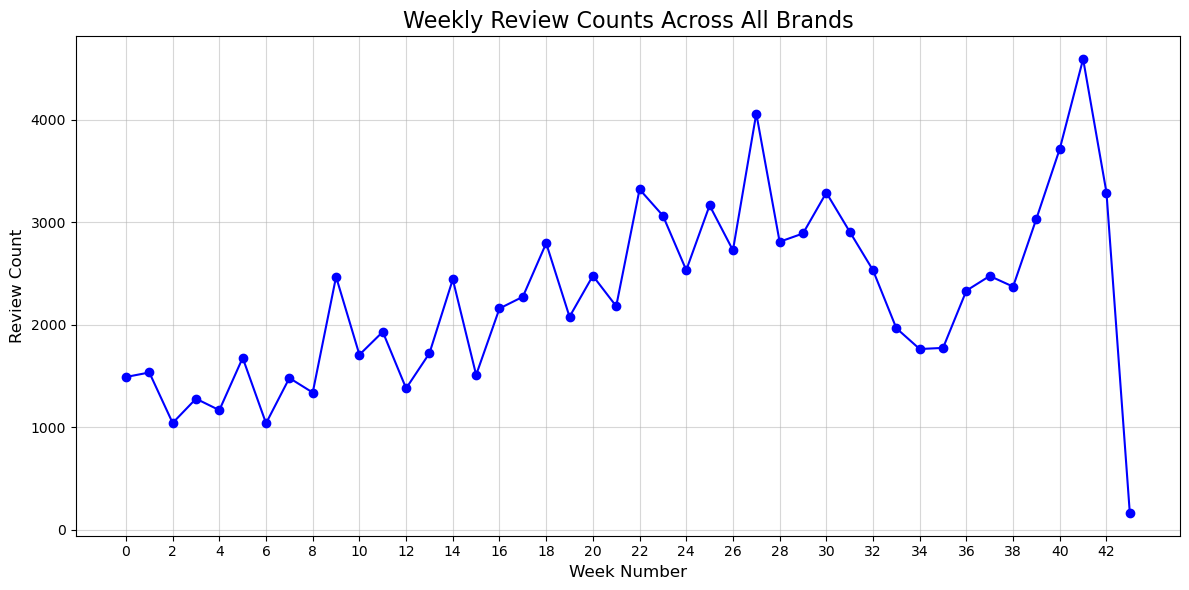

In [7]:
import matplotlib.pyplot as plt

# Convert review_date to datetime for more flexibility
reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'])

# Aggregating to calculate weekly review trends
weekly_review_trends = reviews_df.groupby('review_week').agg({'reviews_id': 'count'}).reset_index()
weekly_review_trends.rename(columns={'reviews_id': 'review_count'}, inplace=True)

# Creating the time series plot
plt.figure(figsize=(12, 6))
plt.plot(weekly_review_trends['review_week'], weekly_review_trends['review_count'], marker='o', linestyle='-', color='blue')

# Adding labels, title, and grid
plt.title('Weekly Review Counts Across All Brands', fontsize=16)
plt.xlabel('Week Number', fontsize=12)
plt.ylabel('Review Count', fontsize=12)
plt.grid(alpha=0.5)
plt.xticks(range(min(weekly_review_trends['review_week']), max(weekly_review_trends['review_week']) + 1, 2))

plt.tight_layout()
plt.show()

### • Analyze the distribution of review lengths and visualize the results.

Descriptive Statistics for Review Lengths:
count    100000.000000
mean         15.068290
std          17.535254
min           3.000000
25%           5.000000
50%           9.000000
75%          19.000000
max         592.000000
Name: review_length, dtype: float64


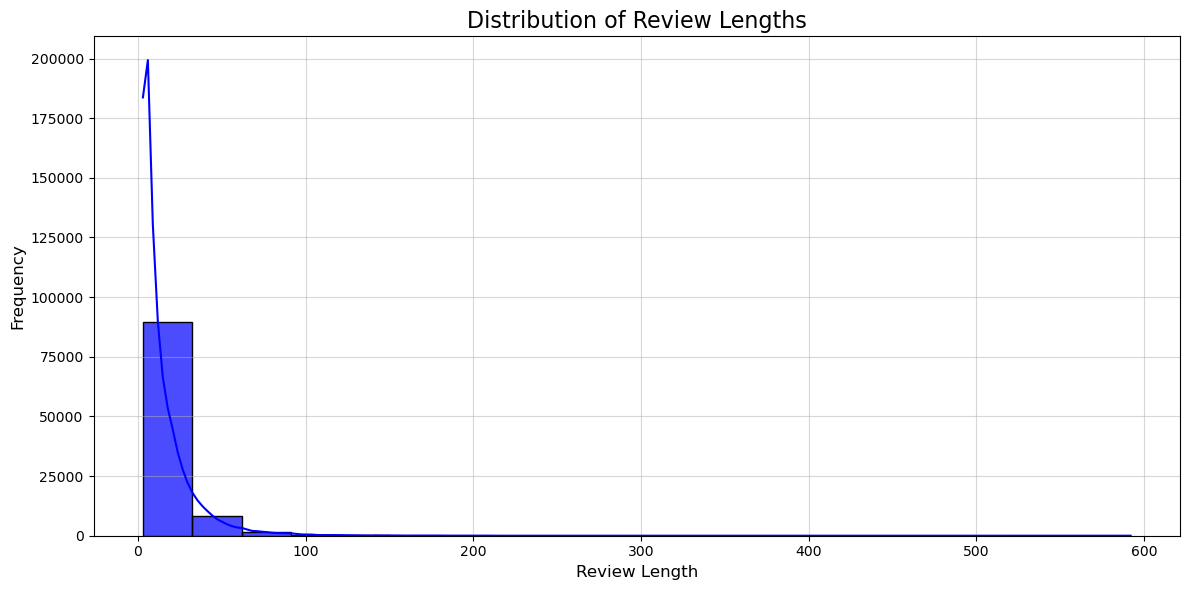

In [8]:
import seaborn as sns

# Analyze the distribution of review lengths
print("Descriptive Statistics for Review Lengths:")
print(reviews_df['review_length'].describe())

# Visualize the distribution of review lengths
plt.figure(figsize=(12, 6))

# Histogram
sns.histplot(reviews_df['review_length'], bins=20, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Review Lengths', fontsize=16)
plt.xlabel('Review Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Kernel density plot shows the distribution of the review_lengths')

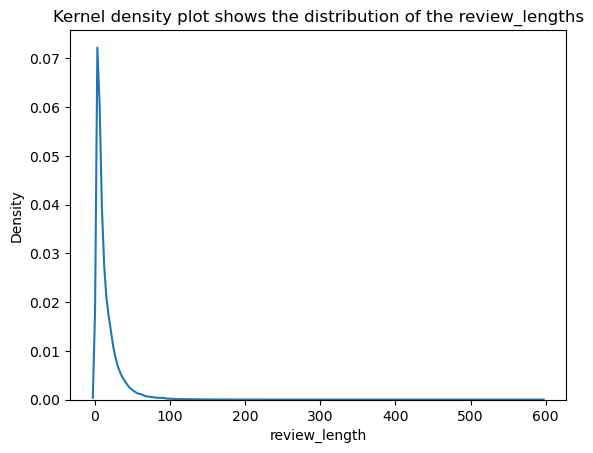

In [9]:
sns.kdeplot(reviews_df['review_length'])
plt.title('Kernel density plot shows the distribution of the review_lengths')

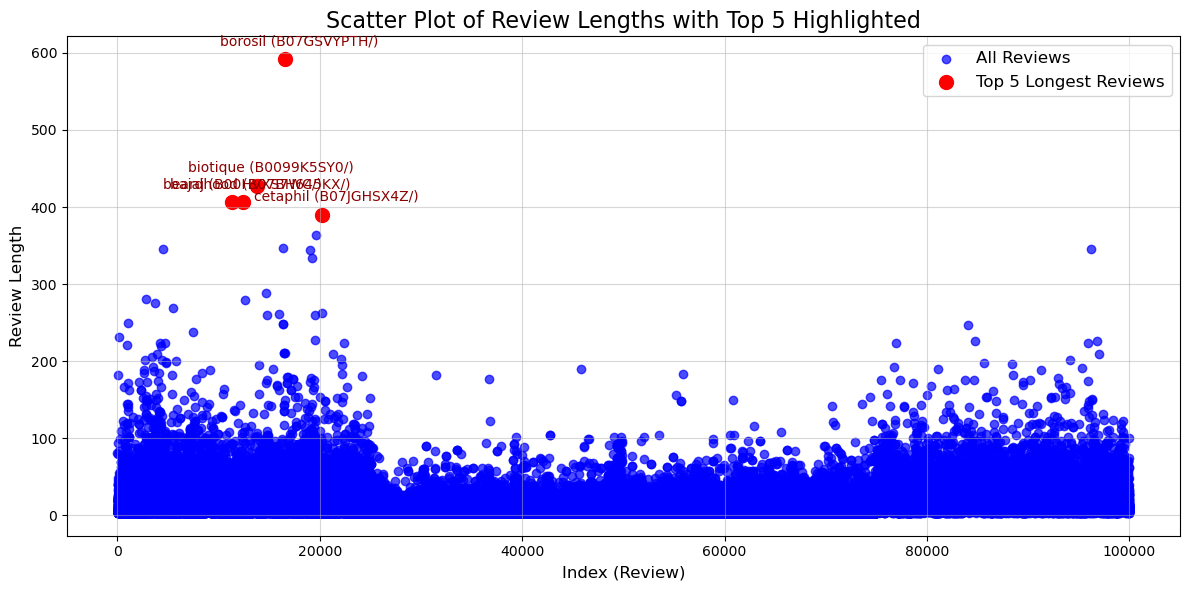

The top 5 lengthy reviews, respective products and its ratings are as follows :


,product_id,brand_v2,brand,review_title,review_length,review_rating
16579,B07GSVYPTH/,borosil,borosil,this is a really good lunch box i took a leap ...,592,5
13751,B0099K5SY0/,biotique,biotique,best product for hair growth,427,5
11299,B00HVXS7WC/,bajaj,bajaj,bajaj rex 500 watt mixer grinder with 3 jars p...,406,4
12394,B07BH645KX/,beardhood,beardhood,best in the market,406,5
20237,B07JGHSX4Z/,cetaphil,cetaphil,no side effects on my family and friends,390,5


In [10]:
# Find the top 5 reviews with the longest review_length
top_5_reviews = reviews_df.nlargest(5, 'review_length')

# Scatter plot for all reviews
plt.figure(figsize=(12, 6))
plt.scatter(reviews_df.index, reviews_df['review_length'], alpha=0.7, color='blue', label='All Reviews')

# Highlight the top 5 longest reviews
plt.scatter(top_5_reviews.index, top_5_reviews['review_length'], color='red', s=100, label='Top 5 Longest Reviews')

# Annotate the top 5 reviews
for idx, row in top_5_reviews.iterrows():
    plt.annotate(
        f"{row['brand']} ({row['product_id']})", 
        (idx, row['review_length']), 
        textcoords="offset points", 
        xytext=(10, 10), 
        ha='center', fontsize=10, color='darkred'
    )

# Add labels, legend, and title
plt.title('Scatter Plot of Review Lengths with Top 5 Highlighted', fontsize=16)
plt.xlabel('Index (Review)', fontsize=12)
plt.ylabel('Review Length', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

print('The top 5 lengthy reviews, respective products and its ratings are as follows :')
top_5_reviews[['product_id', 'brand_v2','brand', 'review_title','review_length','review_rating']]

In [11]:
print('The sources for the reviews are :')
print(reviews_df['source'].unique())

The sources for the reviews are :
['amazon' 'flipkart' 'myntra' 'nykaa']


#### Top 5 most reviewed products and their brands

In [12]:
# Count the number of reviews for each product
product_review_counts = reviews_df['product_id'].value_counts()

# Get the top 5 most reviewed product IDs
top_5_product_ids = product_review_counts.head(5)

# Create a DataFrame for the top 5 products
top_5_df = reviews_df[reviews_df['product_id'].isin(top_5_product_ids.index)].drop_duplicates(subset=['product_id'])

# Merge the counts into the top 5 DataFrame
top_5_df['review_count'] = top_5_df['product_id'].map(top_5_product_ids)

# Select relevant columns for output
top_5_df = top_5_df[['product_id', 'brand', 'review_count']].sort_values(by='review_count', ascending=False)

# Print the result
print("Top 5 Most Reviewed Products, brands and their review count :")
top_5_df

Top 5 Most Reviewed Products, brands and their review count :


,product_id,brand,review_count
75007,10572325/,a derma,334
76167,7380268/,acne squad,293
99106,16900408/,beauty of joseon,288
94278,15524529/,bblunt,286
85243,15716963/,aravi organic,282


### Overall brand performance

In [13]:
# Group by brand and aggregate metrics
brand_performance = ratings_df.groupby('brand').agg(
    total_review_count=('review_count', 'sum'),
    total_rating_count=('count_overall', 'sum'),
    avg_rating=('rating_overall', 'mean'),
    total_5star=('count_5star', 'sum'),
    total_4star=('count_4star', 'sum'),
    total_3star=('count_3star', 'sum'),
    total_2star=('count_2star', 'sum'),
    total_1star=('count_1star', 'sum'),
)

# Calculate additional performance metrics
brand_performance['percent_5star'] = (brand_performance['total_5star'] / brand_performance['total_rating_count']) * 100
brand_performance['percent_4star'] = (brand_performance['total_4star'] / brand_performance['total_rating_count']) * 100
brand_performance['weighted_rating'] = (
    5 * brand_performance['total_5star'] +
    4 * brand_performance['total_4star'] +
    3 * brand_performance['total_3star'] +
    2 * brand_performance['total_2star'] +
    1 * brand_performance['total_1star']
) / brand_performance['total_rating_count']

# Sort by weighted rating or other metrics
brand_performance = brand_performance.sort_values(by='weighted_rating', ascending=False)

# Reset index for better readability
brand_performance.reset_index(inplace=True)

# Display the result
print("Overall Brand Performance:")
brand_performance.head()

Overall Brand Performance:


,brand,total_review_count,total_rating_count,avg_rating,total_5star,total_4star,total_3star,total_2star,total_1star,percent_5star,percent_4star,weighted_rating
0,raenterprising,1,1,3.9,38,18,9,3,11,3800.0,1800.000000,306.000000
1,amit fashion,2,2,4.4,71,22,6,4,5,3550.0,1100.000000,237.000000
2,aamna enterprises,30,30,3.8,1023,205,173,154,290,3410.0,683.333333,235.066667
3,yourcare,1,1,3.7,27,7,8,3,9,2700.0,700.000000,202.000000
4,karishma kreations,1,1,3.9,26,9,9,0,7,2600.0,900.000000,200.000000


### Products receiving the most positive and negative feedback.

In [14]:
# Group by product_id and calculate metrics
product_feedback = reviews_df.groupby('product_id').agg(
    avg_rating=('review_rating', 'mean'),
    total_reviews=('reviews_id', 'count'),
    count_5star=('review_rating', lambda x: (x == 5).sum()),
    count_1star=('review_rating', lambda x: (x == 1).sum()),
    count_2star=('review_rating', lambda x: (x == 2).sum())
)

# Sort for most positive and negative feedback
most_positive = product_feedback.sort_values(by=['avg_rating', 'count_5star'], ascending=[False, False]).head(5)
most_negative = product_feedback.sort_values(by=['avg_rating', 'count_1star', 'count_2star'], ascending=[True, False, False]).head(5)

# Display results
print("Top 5 Products with Most Positive Feedback:")
most_positive

Top 5 Products with Most Positive Feedback:


,avg_rating,total_reviews,count_5star,count_1star,count_2star
product_id,,,,,
15963106/,5.0,69,69,0,0
13703518/,5.0,59,59,0,0
14342697/,5.0,54,54,0,0
BSTH2BFQE4XJZXZZ/,5.0,43,43,0,0
11999256/,5.0,36,36,0,0


In [15]:
print("\nTop 5 Products with Most Negative Feedback:")
most_negative


Top 5 Products with Most Negative Feedback:


,avg_rating,total_reviews,count_5star,count_1star,count_2star
product_id,,,,,
B0CMHYFXG7/,1.0,7,0,7,0
12263636/,1.0,6,0,6,0
CRGGXZBBNJDSP85F/,1.0,6,0,6,0
SWSFK5XY6MCATHKU/,1.0,6,0,6,0
TLPF6D5WUGYAHFYH/,1.0,6,0,6,0


### • Trends in review volume and ratings over time.

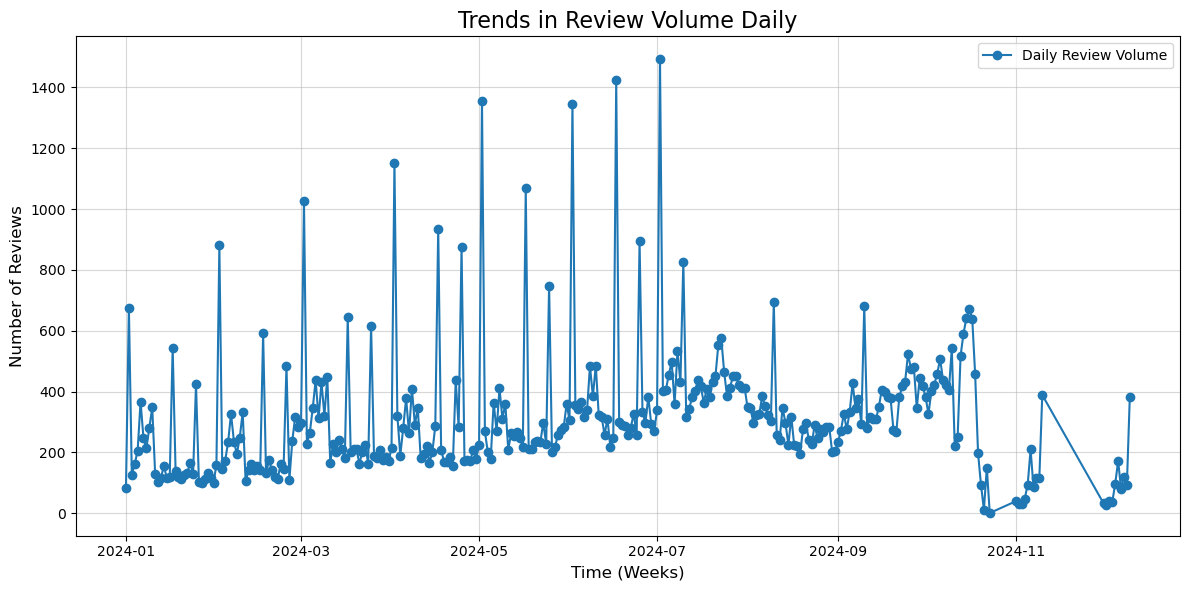

In [16]:
# converting review_date to a datetime object
reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'])

# Group by review_week to calculate weekly review volume
weekly_review_volume = reviews_df.groupby('review_week')['reviews_id'].count().reset_index()
weekly_review_volume.rename(columns={'reviews_id': 'review_count'}, inplace=True)

# Group by review_date to calculate daily review volume (optional)
daily_review_volume = reviews_df.groupby('review_date')['reviews_id'].count().reset_index()
daily_review_volume.rename(columns={'reviews_id': 'review_count'}, inplace=True)

# Plot trends in review volume (weekly and daily)
plt.figure(figsize=(12, 6))

# Weekly trend
#plt.plot(weekly_review_volume['review_week'], weekly_review_volume['review_count'], label='Weekly Review Volume', marker='o')

# daily trend
plt.plot(daily_review_volume['review_date'], daily_review_volume['review_count'], label='Daily Review Volume', marker='o')

# Add labels and title
plt.title('Trends in Review Volume Daily', fontsize=16)
plt.xlabel('Time (Weeks)', fontsize=12)  # Change to 'Time (Days)' if plotting daily trends
plt.ylabel('Number of Reviews', fontsize=12)
plt.grid(alpha=0.5)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

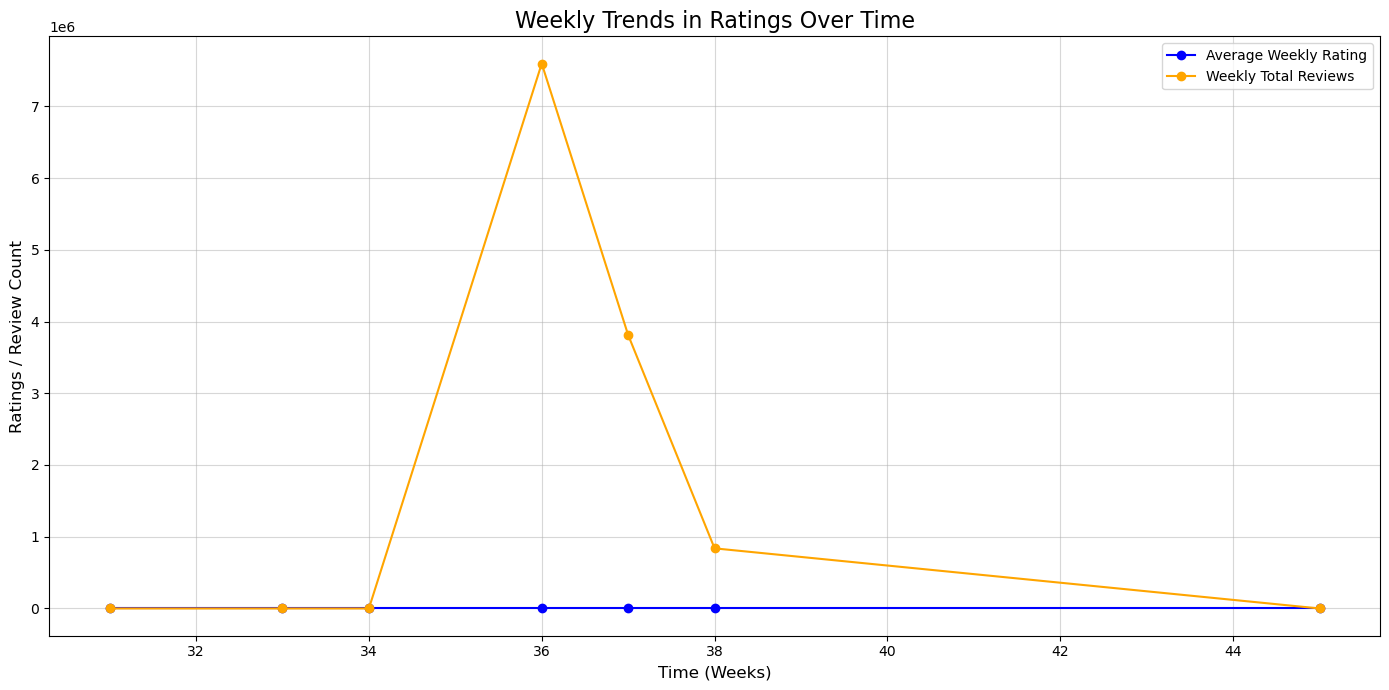

In [17]:
# converting scraped_date to a datetime object
ratings_df['scraped_date'] = pd.to_datetime(ratings_df['scraped_date'])

# Group by scraped_week to calculate weekly average rating and review count
weekly_rating_trend = ratings_df.groupby('scraped_week').agg(
    avg_rating=('rating_overall', 'mean'),
    total_reviews=('review_count', 'sum')
).reset_index()

# Group by scraped_date to calculate daily trends (optional)
daily_rating_trend = ratings_df.groupby('scraped_date').agg(
    avg_rating=('rating_overall', 'mean'),
    total_reviews=('review_count', 'sum')
).reset_index()

# Plot trends
plt.figure(figsize=(14, 7))

# Weekly trend
plt.plot(weekly_rating_trend['scraped_week'], weekly_rating_trend['avg_rating'], label='Average Weekly Rating', marker='o', color='blue')
plt.plot(weekly_rating_trend['scraped_week'], weekly_rating_trend['total_reviews'], label='Weekly Total Reviews', marker='o', color='orange')

# Daily trend
#plt.plot(daily_rating_trend['scraped_date'], daily_rating_trend['avg_rating'], label='Average Daily Rating', marker='o', color='blue')
#plt.plot(daily_rating_trend['scraped_date'], daily_rating_trend['total_reviews'], label='Daily Total Reviews', marker='o', color='orange')

# Add labels, legend, and title
plt.title('Weekly Trends in Ratings Over Time', fontsize=16)
plt.xlabel('Time (Weeks)', fontsize=12)  # Change to 'Time (Days)' if using daily trends
plt.ylabel('Ratings / Review Count', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

### Compare summaries of a few brands using cosine similarity.

In [18]:
pd.set_option('display.max_columns', 50)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine reviews by brand
brand_reviews = reviews_df.groupby('brand')['review_description'].apply(lambda x: ' '.join(x)).reset_index()

# Vectorize the review descriptions using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(brand_reviews['review_description'])

# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a DataFrame to show the similarity results
cosine_sim_df = pd.DataFrame(cosine_sim, index=brand_reviews['brand'], columns=brand_reviews['brand'])

cosine_sim_df

brand,,1 stop fashion,18 21 man made,1st step,1st time,20dresses,250 designs,360 block,3bros,3m,3pin,3six5,3tenx,4711,4wrd by dressberry,513,6th avenue streetwear,7 alt by pantaloons,7 days,7 seven,7seven,7th heaven,8lovees,98 degree north,999 store,...,white sole,white sole company,wildauk,wildhorn,wisely,wishcare,women marks,womens floral,wonderchef,wooden street,wooum,wow skin science,xelig,xiaomi,yardley,yassio women,yessbenza,yoyowing,yves saint,zahra,zeaxon,zerob,zouk,zsigns,zumie
brand,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,1.000000,0.0,0.612605,0.661844,0.062898,0.594277,0.254876,0.278416,0.0,0.597552,0.250483,0.0,0.104525,0.297774,0.673129,0.554775,0.0,0.244483,0.745451,0.370495,0.327298,0.114605,0.0,0.673114,0.095939,...,0.0,0.0,0.0,0.173374,0.481165,0.319502,0.474207,0.0,0.658696,0.381080,0.573988,0.381100,0.0,0.358288,0.314203,0.0,0.0,0.543576,0.595034,0.0,0.357524,0.0,0.422443,0.169065,0.0
1 stop fashion,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
18 21 man made,0.612605,0.0,1.000000,0.452731,0.000000,0.416020,0.200073,0.124661,0.0,0.383579,0.198650,0.0,0.023453,0.166107,0.487143,0.414382,0.0,0.171138,0.451936,0.229813,0.187204,0.008586,0.0,0.495963,0.060451,...,0.0,0.0,0.0,0.086606,0.270981,0.196796,0.289091,0.0,0.411759,0.269134,0.418509,0.306359,0.0,0.238527,0.209922,0.0,0.0,0.477051,0.341012,0.0,0.209410,0.0,0.306109,0.220450,0.0
1st step,0.661844,0.0,0.452731,1.000000,0.046853,0.477971,0.145454,0.115840,0.0,0.598488,0.223931,0.0,0.050919,0.246658,0.612856,0.532924,0.0,0.198581,0.695874,0.309196,0.189720,0.037640,0.0,0.641505,0.096687,...,0.0,0.0,0.0,0.118810,0.470647,0.571886,0.562503,0.0,0.432891,0.367420,0.559317,0.295457,0.0,0.415584,0.258713,0.0,0.0,0.491586,0.559606,0.0,0.557315,0.0,0.368291,0.178147,0.0
1st time,0.062898,0.0,0.000000,0.046853,1.000000,0.027618,0.000000,0.000000,0.0,0.072820,0.000000,0.0,0.000000,0.083734,0.025826,0.026300,0.0,0.000000,0.117840,0.034414,0.043842,0.000000,0.0,0.030667,0.000000,...,0.0,0.0,0.0,0.144568,0.114553,0.000000,0.078938,0.0,0.054854,0.000000,0.000000,0.000000,0.0,0.017201,0.000000,0.0,0.0,0.123267,0.044597,0.0,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeaxon,0.357524,0.0,0.209410,0.557315,0.000000,0.237112,0.000000,0.023860,0.0,0.423150,0.055658,0.0,0.000000,0.168591,0.359338,0.319891,0.0,0.146057,0.455373,0.295277,0.061015,0.000000,0.0,0.433800,0.101604,...,0.0,0.0,0.0,0.000000,0.277502,0.655072,0.324765,0.0,0.234829,0.306222,0.482543,0.175418,0.0,0.290807,0.223679,0.0,0.0,0.369648,0.395524,0.0,1.000000,0.0,0.204839,0.062925,0.0
zerob,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
zouk,0.422443,0.0,0.306109,0.368291,0.000000,0.294480,0.127302,0.056893,0.0,0.280848,0.163921,0.0,0.008727,0.116779,0.367204,0.291185,0.0,0.114909,0.356374,0.170952,0.133500,0.034692,0.0,0.358390,0.048436,...,0.0,0.0,0.0,0.033205,0.155998,0.183391,0.201803,0.0,0.285828,0.192370,0.312229,0.160154,0.0,0.217060,0.137509,0.0,0.0,0.266721,0.246702,0.0,0.204839,0.0,1.000000,0.086297,0.0


In [19]:
cosine_sim_df.index.name = None  # Remove the name from the index
cosine_sim_df.columns.name = None  # Remove the name from columns

# Unstack the matrix to get a pairwise similarity table
cosine_sim_unstacked = cosine_sim_df.unstack().reset_index()

# Rename columns for clarity
cosine_sim_unstacked.columns = ['Brand1', 'Brand2', 'Similarity']

# Drop self-similarity (Brand1 == Brand2)
cosine_sim_unstacked = cosine_sim_unstacked[cosine_sim_unstacked['Brand1'] != cosine_sim_unstacked['Brand2']]

# Drop duplicate brand pairs (e.g., A-B and B-A)
cosine_sim_unstacked['Sorted_Brands'] = cosine_sim_unstacked.apply(lambda x: tuple(sorted([x['Brand1'], x['Brand2']])), axis=1)
cosine_sim_unique = cosine_sim_unstacked.drop_duplicates(subset='Sorted_Brands').drop(columns=['Sorted_Brands'])

# Sort the results by similarity score in descending order
top_similar_brands = cosine_sim_unique.sort_values(by='Similarity', ascending=False).head(10)

In [20]:

# Display the top similar brand pairs
print("Top Similar Brands:")
top_similar_brands

Top Similar Brands:


,Brand1,Brand2,Similarity
812533,little joys,purna gummies,1.000000
955389,sam,spareque,1.000000
804031,liberty,lubardy,1.000000
217248,alpino,sundrop,0.997671
784153,khadi omorose,parachute,0.976950
75676,aask,aayu,0.974271
730669,go kitchen,shalimar,0.969943
94207,abros,labroz,0.963919
272326,aqualogica,beauty of joseon,0.956380
217255,alpino,tagz foods,0.953511


In [21]:
bottom_similar_brands = cosine_sim_unique.sort_values(by='Similarity', ascending=True).head(10)
bottom_similar_brands

,Brand1,Brand2,Similarity
1,,1 stop fashion,0.0
249242,andme,bendjoy,0.0
249243,andme,bennort,0.0
249245,andme,berina,0.0
249246,andme,bestzone retail mall,0.0
249249,andme,beverly hills polo,0.0
249251,andme,bft prime,0.0
249252,andme,bhaven creations,0.0
249253,andme,biba,0.0
249255,andme,bigwing,0.0


### ETL Tasks

In [31]:
import pandas as pd
import mysql.connector

# Database connection details
db_config = {
    'host': '68.178.153.133',
    'user': 'prab',
    'password': 'nb))[d{3f$*r',
    'database': 'cx360_prab'
}

# Connect to the database
conn = mysql.connector.connect(**db_config)

# Extract data from 'details_intern' and 'ratings_intern' tables
query_details = "SELECT * FROM details_intern"
query_ratings = "SELECT * FROM ratings_intern"

details_df = pd.read_sql(query_details, conn)
ratings_df = pd.read_sql(query_ratings, conn)

# Save extracted data to CSV files
details_df.to_csv("details_intern.csv", index=False)
ratings_df.to_csv("ratings_intern.csv", index=False)

print("Data successfully extracted and saved as CSV files.")

# Close the connection
conn.close()

/var/folders/0l/_03phsp93n92lh_gh7j54vv00000gn/T/ipykernel_17622/3450761021.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  details_df = pd.read_sql(query_details, conn)
/var/folders/0l/_03phsp93n92lh_gh7j54vv00000gn/T/ipykernel_17622/3450761021.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ratings_df = pd.read_sql(query_ratings, conn)


Data successfully extracted and saved as CSV files.


In [32]:
# Reload data (if not already in memory)
details_df = pd.read_csv("details_intern.csv")
ratings_df = pd.read_csv("ratings_intern.csv")

# Merge data on 'product_id' and 'source'
merged_df = pd.merge(details_df, ratings_df, on=['product_id', 'source'], how='inner')

# Calculate average ratings per category
category_avg = merged_df.groupby('f_category')['rating_overall'].transform('mean')

# Filter products with below-average ratings
below_avg_df = merged_df[merged_df['rating_overall'] < category_avg]

# Add a new column to indicate below-average ratings
below_avg_df['rating_status'] = 'below_average'

# Save the transformed data into a new CSV
below_avg_df.to_csv("transformed_data.csv", index=False)

print("Data transformation complete. Transformed data saved to 'transformed_data.csv'.")

Data transformation complete. Transformed data saved to 'transformed_data.csv'.


/var/folders/0l/_03phsp93n92lh_gh7j54vv00000gn/T/ipykernel_17622/3205253188.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  below_avg_df['rating_status'] = 'below_average'


In [33]:
below_avg_df

,details_id,source,product_id,product_title,brand_v2,brand_x,priority,f_category,f_sub_category,ratings_id,brand_y,rating_overall,count_overall,count_5star,count_4star,count_3star,count_2star,count_1star,scraped_date,scraped_week,review_count,rating_status
0,3,ajio,460687841001/,meenakari chandbalis with beads,priyaasi,priyaasi,p1,jewellery,earrings,41903,priyaasi,3.0,2,1,0,0,0,1,2024-08-16,33,0,below_average
1,9,ajio,466357554001/,gold plated stone studded necklace earrings set,priyaasi,priyaasi,p1,jewellery,jewellerty_others,51632,priyaasi,3.8,5,1,3,0,1,0,2024-08-16,33,0,below_average
3,12,ajio,465841474001/,stones studded studs earrings,yellow chimes,yellow chimes,p1,jewellery,earrings,49816,yellow chimes,3.8,27,14,3,4,2,4,2024-08-16,33,0,below_average
4,13,ajio,465411305001/,oxidized drop necklace earings set,yellow chimes,yellow chimes,p1,jewellery,jewellerty_others,47645,yellow chimes,3.7,36,17,5,5,4,5,2024-08-16,33,0,below_average
6,18,ajio,465449163001/,gold plated stone studded hair clip,yellow chimes,yellow chimes,p1,beauty,hair_care,47764,yellow chimes,3.8,6,1,3,2,0,0,2024-08-16,33,0,below_average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6423,93915,nykaa,10959207/,red tape womens solid white sneaker,red tape,red tape,p2,footwear,sneakers,87340,red tape,3.6,10,5,1,1,1,2,2024-11-09,45,0,below_average
6425,93926,nykaa,12519070/,campus julius black women running shoes,campus,campus,p2,sports,sports,97861,campus,3.7,3,1,1,0,1,0,2024-11-09,45,0,below_average
6426,93927,nykaa,12003774/,puma shuffle perf res unisex white sneakers,puma,puma,p2,footwear,sneakers,93271,puma,4.0,1,0,1,0,0,0,2024-11-09,45,0,below_average
6429,93993,nykaa,10959201/,red tape womens solid black sneaker,red tape,red tape,p2,footwear,sneakers,87335,red tape,3.8,5,3,0,1,0,1,2024-11-09,45,0,below_average


Demonstrate the usage of Generative AI models ( a few suggestions are given below ) :

● Summarize the top reviews for specific products.

● Identify recurring themes in negative reviews.

● Combine your findings into a concise and automated report (PDF or Excel) with visualizations.

In [22]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from fpdf import FPDF

In [23]:
import re

# Function to clean review text
def clean_text(text):
    text = text.lower()  # convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    return text

# Apply cleaning function to review descriptions
reviews_df['clean_review'] = reviews_df['review_description'].apply(clean_text)


In [24]:
# Filter reviews with high ratings (e.g., rating > 4)
top_reviews = reviews_df[reviews_df['review_rating'] > 4]

# Group by product_id and summarize
top_reviews_summary = top_reviews.groupby('product_id').agg({
    'review_title': 'first',
    'review_description': lambda x: ' '.join(x.head(3)),  # Join top 3 reviews for each product
    'review_rating': 'mean'
}).reset_index()

top_reviews_summary

,product_id,review_title,review_description,review_rating
0,1006735/,a gem,i am totally surprised by its smell i didn t h...,5.0
1,10091247/,de tangles hair nicely,me and my daughter we both have curly hair thi...,5.0
2,10119518/,great,good for long hair,5.0
3,1015733/,does everything what it claims,only soap which actually worked well to reduce...,5.0
4,1016487/,soft and reusable,its good to have this,5.0
...,...,...,...,...
7890,WSPFVMGFN9Z62QJM/,mind blowing purchase,good very good product i am happy this product...,5.0
7891,WSPHYSB5ZUNYGGAP/,great product,i like it its fragrance too good,5.0
7892,WSPHYUGYYYUV99DT/,awesome,great value for money the large box lasts a lo...,5.0
7893,WSRGGPCNU3EPPGGR/,awesome,very nice product very nice product very nice ...,5.0


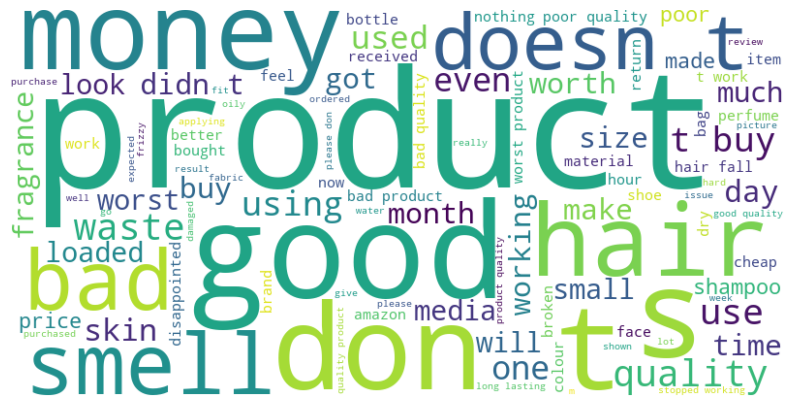

In [25]:
# Filter negative reviews (rating ≤ 2)
negative_reviews = reviews_df[reviews_df['review_rating'] <= 2]

# For theme extraction, we will use LDA or wordcloud.
negative_reviews_text = ' '.join(negative_reviews['clean_review'])

# Create a word cloud for visualization
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(negative_reviews_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
# Vectorize the negative reviews text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(negative_reviews['clean_review'])

# Apply LDA to find topics
lda = LDA(n_components=5, random_state=42)
lda.fit(X)

# Display top words for each topic
terms = vectorizer.get_feature_names_out()
for index, topic in enumerate(lda.components_):
    print(f"Topic {index}: " + " ".join([terms[i] for i in topic.argsort()[-10:]]))

Topic 0: cheap bag material loaded media poor bad good product quality
Topic 1: month worst stopped customer use service months days product working
Topic 2: didn fragrance long small doesn size smell good like skin
Topic 3: use shampoo dry buy using don waste product money hair
Topic 4: worth received price bad worst like quality buy don product


In [35]:
top_reviews_summary

,product_id,review_title,review_description,review_rating
0,1006735/,a gem,i am totally surprised by its smell i didn t h...,5.0
1,10091247/,de tangles hair nicely,me and my daughter we both have curly hair thi...,5.0
2,10119518/,great,good for long hair,5.0
3,1015733/,does everything what it claims,only soap which actually worked well to reduce...,5.0
4,1016487/,soft and reusable,its good to have this,5.0
...,...,...,...,...
7890,WSPFVMGFN9Z62QJM/,mind blowing purchase,good very good product i am happy this product...,5.0
7891,WSPHYSB5ZUNYGGAP/,great product,i like it its fragrance too good,5.0
7892,WSPHYUGYYYUV99DT/,awesome,great value for money the large box lasts a lo...,5.0
7893,WSRGGPCNU3EPPGGR/,awesome,very nice product very nice product very nice ...,5.0


In [ ]:
'''class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(200, 10, 'Product Review Analysis Report', ln=True, align='C')

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(200, 10, title, ln=True, align='L')

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)

    def add_chart(self, chart_img):
        self.image(chart_img, x=10, w=180)

# Initialize PDF
pdf = PDF()
pdf.add_page()


# Add top reviews summary section
pdf.chapter_title('Top Reviews for Specific Products')
for _, row in top_reviews_summary.iterrows():
    #product_title = row['product_title']
    review = row['review_description']
    rating = row['review_rating']
    pdf.chapter_body(f"Product: {product_title}\nAverage Rating: {rating}\nReviews: {review}\n\n")

# Add negative reviews theme section
pdf.chapter_title('Recurring Themes in Negative Reviews')
pdf.chapter_body('Negative reviews focus on the following themes: \n- [List common themes from LDA analysis]\n')

# Add Word Cloud Chart
wordcloud_img = 'wordcloud.png'
wordcloud.to_file(wordcloud_img)
pdf.add_chart(wordcloud_img)

# Save the PDF
pdf.output("product_reviews_report.pdf")
'''

UnicodeEncodeError: 'latin-1' codec can't encode character '\u0161' in position 2087: ordinal not in range(256)

In [38]:
from transformers import pipeline

# Load a pre-trained BART model for text summarization
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

Device set to use mps:0


In [39]:
# Filter the reviews for top-rated products (e.g., rating >= 4)
top_reviews = reviews_df[reviews_df['review_rating'] >= 4]

# Group reviews by product_id and summarize the descriptions
def summarize_reviews(reviews):
    # Combine reviews for a specific product into a single text block
    combined_reviews = " ".join(reviews)
    
    # Use the summarizer model to generate a concise summary
    summary = summarizer(combined_reviews, max_length=150, min_length=50, do_sample=False)
    
    return summary[0]['summary_text']

# Group by product_id and apply summarization function
top_reviews_summary = top_reviews.groupby('product_id')['review_description'].apply(summarize_reviews).reset_index()

# Display the summarized reviews for each product
print(top_reviews_summary.head())


Your max_length is set to 150, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)
Your max_length is set to 150, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 150, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


KeyboardInterrupt: 

In [ ]:
# Split reviews into smaller chunks if the combined text exceeds the model's token limit
def summarize_reviews_chunked(reviews, chunk_size=1000):
    combined_reviews = " ".join(reviews)
    # Split the combined reviews into chunks if the text length exceeds the chunk_size
    chunks = [combined_reviews[i:i + chunk_size] for i in range(0, len(combined_reviews), chunk_size)]
    
    # Generate summaries for each chunk and join them
    summaries = [summarizer(chunk, max_length=150, min_length=50, do_sample=False)[0]['summary_text'] for chunk in chunks]
    return " ".join(summaries)

# Group by product_id and apply chunked summarization function
top_reviews_summary_chunked = top_reviews.groupby('product_id')['review_description'].apply(summarize_reviews_chunked).reset_index()

# Display the chunked summaries for each product
print(top_reviews_summary_chunked.head())


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate WordCloud for negative reviews (rating <= 2)
negative_reviews_text = ' '.join(negative_reviews['clean_review'])

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(negative_reviews_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
